# The Dow Jones Industrial Average and Its 30 Components

## Downloading Dow componentms datasets from Quandl

In [1]:
import quandl
#warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
QUANDL_API_KEY = 'BCzkk3NDWt7H9yjzx-DY'  # Your own Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

START_DATE, END_DATE = '2017-01-01', '2017-12-31'

SYMBOLS = [
    'AAPL','MMM', 'AXP', 'BA', 'CAT',
    'CVX', 'CSCO', 'KO', 'DD', 'XOM',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ',
    'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'UNH', 'UTX', 'TRV', 
    'VZ', 'V', 'WMT', 'WBA', 'DIS',
]

wiki_symbols = ['WIKI/%s'%symbol for symbol in SYMBOLS]
df_components = quandl.get(
    wiki_symbols, 
    start_date=START_DATE, 
    end_date=END_DATE, 
    column_index=11)
df_components.columns = SYMBOLS  # Renaming the columns

In [3]:
df_components.head()

,AAPL,MMM,AXP,BA,CAT,CVX,CSCO,KO,DD,XOM,...,PFE,PG,UNH,UTX,TRV,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,114.715378,174.831943,74.162246,152.668443,91.258087,114.381567,29.484966,40.770394,72.575434,87.567241,...,31.756236,81.645971,159.581286,108.929230,NaN,53.359309,79.081715,67.291215,81.821163,105.285393
2017-01-04,114.586983,175.097063,75.372857,154.273227,90.850294,114.352450,29.311184,40.624089,73.127563,86.603799,...,32.035306,81.936871,160.035961,108.998029,NaN,53.300650,79.728295,67.683241,81.840888,106.635206
2017-01-05,115.169696,174.498088,74.443792,154.360760,90.296862,113.857459,29.379349,40.721626,72.772623,85.312787,...,32.343245,82.479884,160.302836,109.440312,NaN,53.417967,80.663349,67.830251,81.890202,106.575655
2017-01-06,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,...,32.218145,82.450794,160.530174,110.619731,NaN,52.632926,81.777456,66.899190,81.959241,108.163670
2017-01-09,117.520300,174.066041,74.977510,153.981448,89.685174,112.430723,29.389087,40.302218,72.683888,83.857990,...,32.208521,81.839904,160.075498,109.587739,NaN,52.059755,81.319877,67.340219,81.416791,107.548315


In [4]:
filled_df_components = df_components.fillna(method='ffill')
daily_df_components = filled_df_components.resample('24h').ffill()
daily_df_components = daily_df_components.fillna(method='bfill')

In [5]:
daily_df_components.head()

,AAPL,MMM,AXP,BA,CAT,CVX,CSCO,KO,DD,XOM,...,PFE,PG,UNH,UTX,TRV,VZ,V,WMT,WBA,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,114.715378,174.831943,74.162246,152.668443,91.258087,114.381567,29.484966,40.770394,72.575434,87.567241,...,31.756236,81.645971,159.581286,108.929230,120.549246,53.359309,79.081715,67.291215,81.821163,105.285393
2017-01-04,114.586983,175.097063,75.372857,154.273227,90.850294,114.352450,29.311184,40.624089,73.127563,86.603799,...,32.035306,81.936871,160.035961,108.998029,120.549246,53.300650,79.728295,67.683241,81.840888,106.635206
2017-01-05,115.169696,174.498088,74.443792,154.360760,90.296862,113.857459,29.379349,40.721626,72.772623,85.312787,...,32.343245,82.479884,160.302836,109.440312,120.549246,53.417967,80.663349,67.830251,81.890202,106.575655
2017-01-06,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,...,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670
2017-01-07,116.453639,175.008690,74.592047,154.740073,90.335699,113.401292,29.437777,40.711872,72.348667,85.264615,...,32.218145,82.450794,160.530174,110.619731,120.549246,52.632926,81.777456,66.899190,81.959241,108.163670


## Downloading DJIA Dataset from Alpha Vantage

In [6]:
import yfinance as yf
df = yf.download(['^DJI'], start=START_DATE, end=END_DATE, adjusted=True, progress=False)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,19872.859375,19938.529297,19775.929688,19881.759766,19881.759766,339180000
2017-01-04,19890.939453,19956.140625,19878.830078,19942.160156,19942.160156,280010000
2017-01-05,19924.560547,19948.599609,19811.119141,19899.289062,19899.289062,269920000
2017-01-06,19906.960938,19999.630859,19834.080078,19963.800781,19963.800781,277700000
2017-01-09,19931.410156,19943.779297,19887.380859,19887.380859,19887.380859,287510000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [9]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [10]:
import pandas as pd

# Prepare the dataframe
df_dji = pd.DataFrame(df['Adj Close'])
df_dji.columns = ['DJIA']
df_dji.index = pd.to_datetime(df_dji.index)

# Trim the new dataframe and resample
djia_2017 = pd.DataFrame(df_dji.loc['2017-01-01':'2017-12-31'])
djia_2017 = djia_2017.resample('24h').ffill()

# Applying a Kernel Principal Component Analysis

## Finding Eigenvectors and Eigenvalues

In [11]:
from sklearn.decomposition import KernelPCA

fn_z_score = lambda x: (x - x.mean()) / x.std()

df_z_components = daily_df_components.apply(fn_z_score)
fitted_pca = KernelPCA().fit(df_z_components)

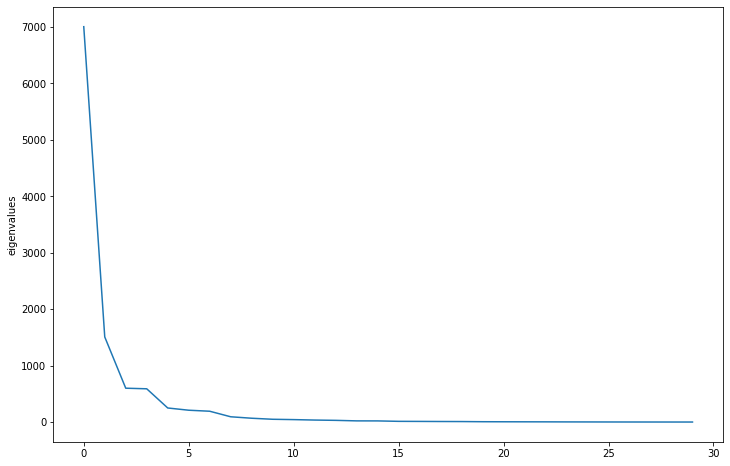

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fitted_pca.lambdas_)
plt.ylabel('eigenvalues')
plt.show();

In [13]:
fn_weighted_avg = lambda x: x / x.sum()
weighted_values = fn_weighted_avg(fitted_pca.lambdas_)[:5]

In [14]:
print(weighted_values)

[0.64863002 0.13966718 0.05558246 0.05461861 0.02313883]


In [15]:
weighted_values.sum()

0.9216371041932274

## Reconstructing the Dow Index with PCA

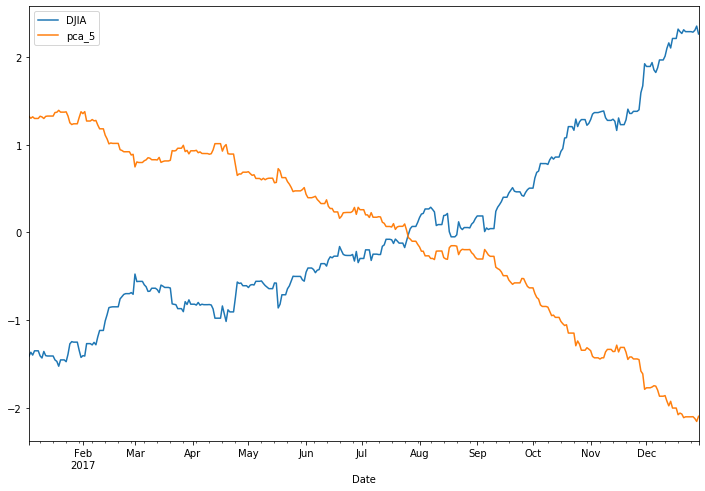

In [16]:
import numpy as np

kernel_pca = KernelPCA(n_components=5).fit(df_z_components)
pca_5 = kernel_pca.transform(-daily_df_components)

weights = fn_weighted_avg(kernel_pca.lambdas_)
reconstructed_values = np.dot(pca_5, weights)

# Combine DJIA and PCA index for comparison
df_combined = djia_2017.copy()
df_combined['pca_5'] = reconstructed_values
df_combined = df_combined.apply(fn_z_score)
df_combined.plot(figsize=(12, 8));

# Analyzing a time series with trend

In [17]:
import quandl

QUANDL_API_KEY = 'BCzkk3NDWt7H9yjzx-DY'  # Your Quandl key here
quandl.ApiConfig.api_key = QUANDL_API_KEY

df = quandl.get(
    'CHRIS/CME_GC1', 
    column_index=6,
    collapse='monthly',
    start_date='2000-01-01')

In [18]:
df.head()

,Settle
Date,
2000-01-31,283.2
2000-02-29,294.2
2000-03-31,278.4
2000-04-30,274.7
2000-05-31,271.7


In [19]:
df_settle = df['Settle'].resample('MS').ffill().dropna()

df_rolling = df_settle.rolling(12)
df_mean = df_rolling.mean()
df_std = df_rolling.std()

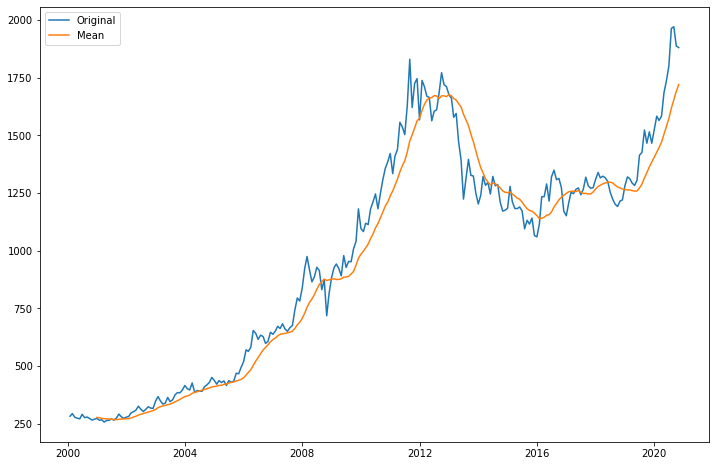

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(df_settle, label='Original')
plt.plot(df_mean, label='Mean')
plt.legend();

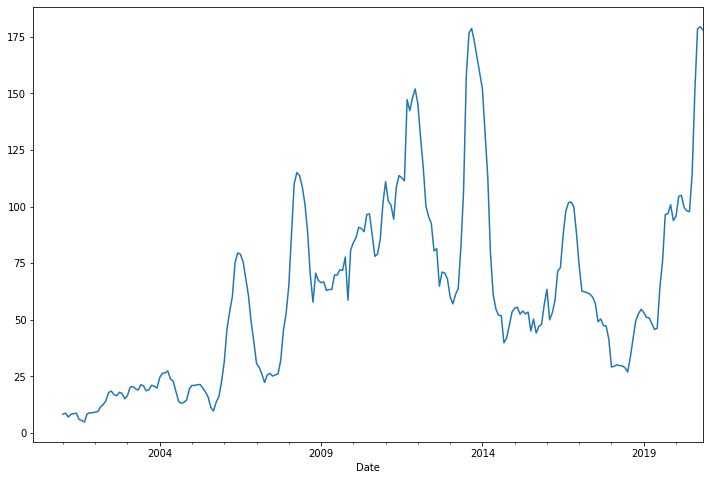

In [21]:
df_std.plot(figsize=(12, 8));

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_settle)
print('ADF statistic: ',  result[0])
print('p-value:', result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -0.6276338596977049
p-value: 0.8646148623918283
Critical value (1%): -3.458
Critical value (5%): -2.874
Critical value (10%): -2.573


# Making a time series stationary

## Detrending

In [23]:
import numpy as np

df_log = np.log(df_settle)

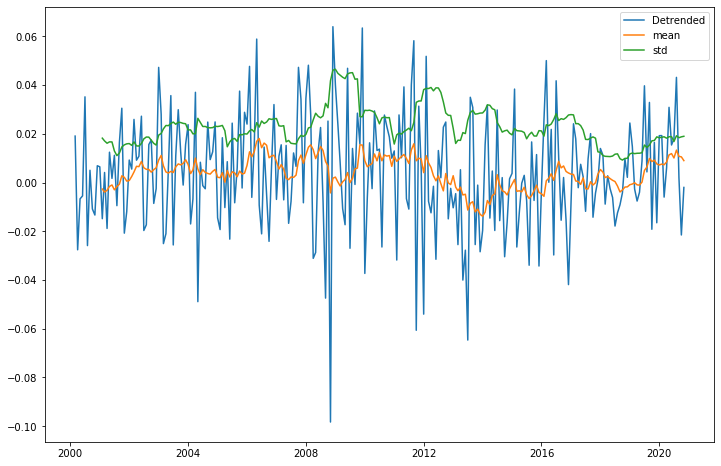

In [24]:
df_log_ma= df_log.rolling(2).mean()
df_detrend = df_log - df_log_ma
df_detrend.dropna(inplace=True)

# Mean and standard deviation of detrended data
df_detrend_rolling = df_detrend.rolling(12)
df_detrend_ma = df_detrend_rolling.mean()
df_detrend_std = df_detrend_rolling.std()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_detrend, label='Detrended')
plt.plot(df_detrend_ma, label='mean')
plt.plot(df_detrend_std, label='std')
plt.legend(loc='upper right');

In [25]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_detrend)
print('ADF statistic: ', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic:  -17.72342168755172
p-value: 0.00000
Critical value (1%): -3.457
Critical value (5%): -2.873
Critical value (10%): -2.573


## Removing trend by differencing

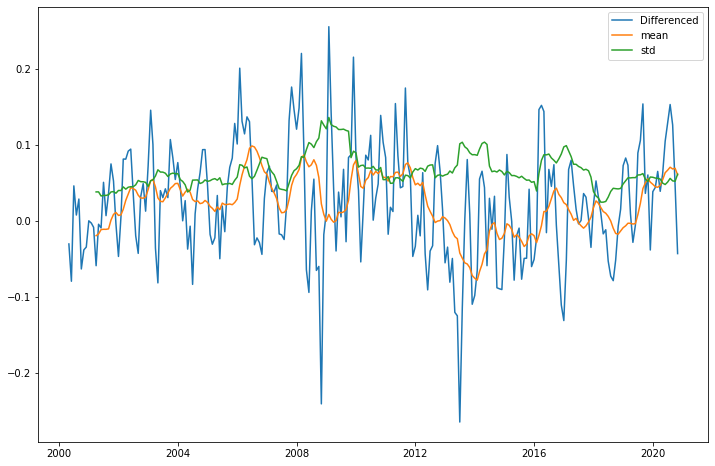

In [26]:
df_log_diff = df_log.diff(periods=3).dropna()

# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='mean')
plt.plot(df_diff_std, label='std')
plt.legend(loc='upper right');

In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_log_diff)

print('ADF statistic:', result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -3.1742407336758736
p-value: 0.02152
Critical value (1%): -3.459
Critical value (5%): -2.874
Critical value (10%): -2.573


## Seasonal Decomposing

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result = seasonal_decompose(df_log.dropna(), freq=12)

df_trend = decompose_result.trend
df_season = decompose_result.seasonal
df_residual = decompose_result.resid

/Users/ankitrawat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


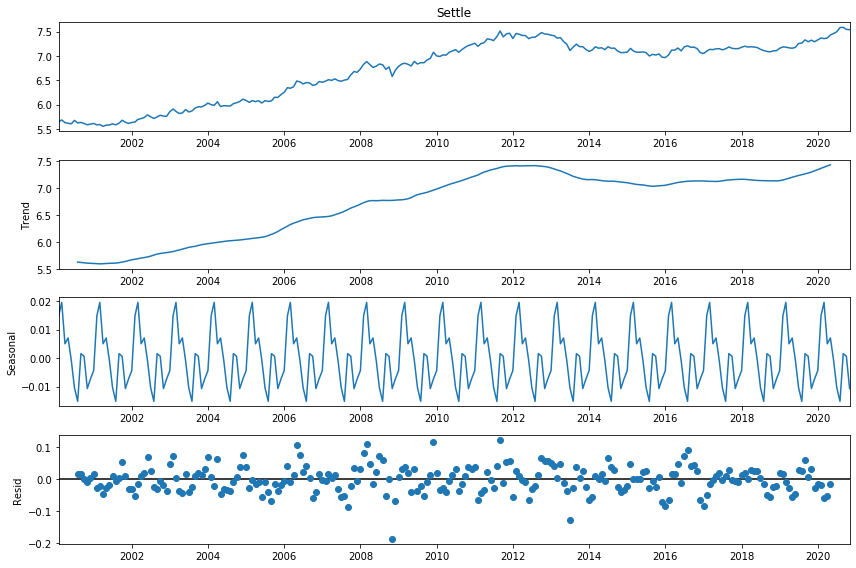

In [42]:
plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

In [47]:
df_log_diff = df_residual.diff().dropna()
df_log_diff

Date
2000-09-01   -0.000067
2000-10-01   -0.013668
2000-11-01   -0.010564
2000-12-01    0.013025
2001-01-01    0.013927
                ...   
2020-01-01    0.013586
2020-02-01   -0.004125
2020-03-01   -0.040676
2020-04-01    0.005509
2020-05-01    0.040138
Freq: MS, Name: resid, Length: 237, dtype: float64

In [46]:
df_residual

Date
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
2000-06-01   NaN
              ..
2020-07-01   NaN
2020-08-01   NaN
2020-09-01   NaN
2020-10-01   NaN
2020-11-01   NaN
Freq: MS, Name: resid, Length: 250, dtype: float64

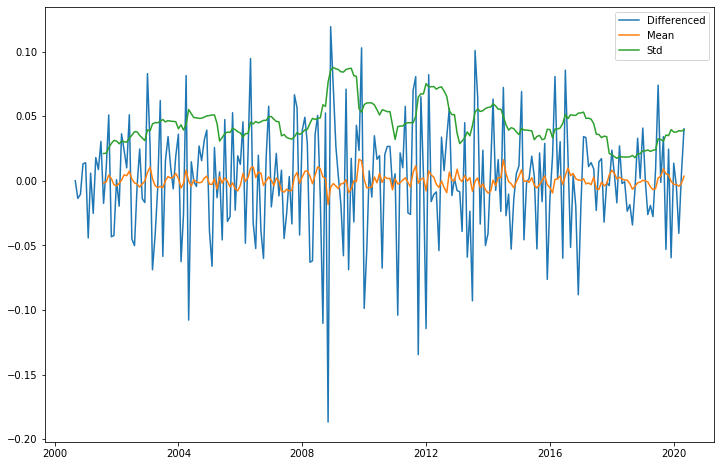

In [30]:
# Mean and standard deviation of differenced data
df_diff_rolling = df_log_diff.rolling(12)
df_diff_ma = df_diff_rolling.mean()
df_diff_std = df_diff_rolling.std()

# Plot the stationary data
plt.figure(figsize=(12, 8))
plt.plot(df_log_diff, label='Differenced')
plt.plot(df_diff_ma, label='Mean')
plt.plot(df_diff_std, label='Std')
plt.legend();

In [31]:
result = adfuller(df_residual.dropna())

print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])

critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -6.874699654529695
p-value: 0.00000
Critical value (1%): -3.460
Critical value (5%): -2.874
Critical value (10%): -2.574


# Forecasting and Predicting a Time Series

## Finding model parameters by grid search

In [1]:
import itertools    
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))

    lowest_aic, pdq, pdqs = None, None, None

    total_iterations = 0
    for order in param_combinations:    
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(df_settle, order=order, 
                    seasonal_order=seasonal_order, 
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                    disp=False
                )
                model_result = model.fit(maxiter=200, disp=False)

                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order

            except Exception as ex:
                continue

    return lowest_aic, pdq, pdqs 

In [57]:
lowest_aic, order, seasonal_order = arima_grid_search(df_settle, 12)

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:15:58   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:15:59   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:00   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:01   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:02   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:03   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:04   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:05   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:07   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:08   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    15:16:10   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

In [ ]:
print('ARIMA{}x{}'.format(order, seasonal_order))
print('Lowest AIC: %.3f'%lowest_aic)

In [54]:
seasonal_order

(0, 1, 1, 12)

## Fitting the SARIMAX model

In [51]:
model = SARIMAX(
    df_settle,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
    disp=False
)

model_results = model.fit(maxiter=200, disp=False)

In [36]:
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Settle   No. Observations:                  250
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1220.971
Date:                            Thu, 26 Nov 2020   AIC                           2447.943
Time:                                    14:10:38   BIC                           2458.164
Sample:                                02-01-2000   HQIC                          2452.069
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1229      0.044     -2.819      0.005      -0.208      -0.037
ma.S.L12      -0.9582      0.147   

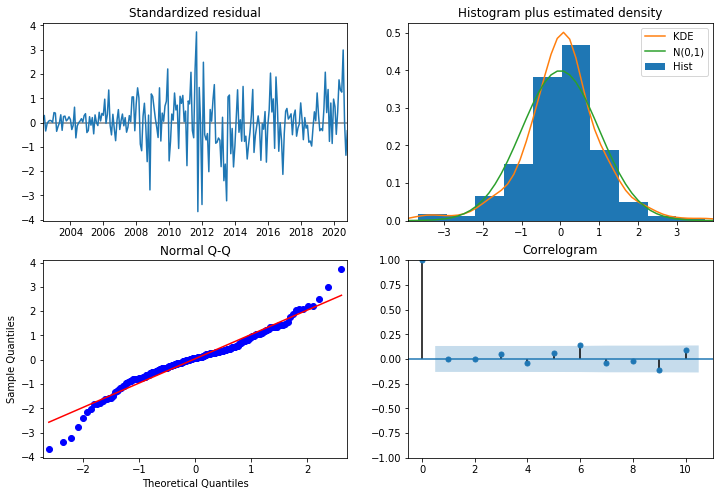

In [37]:
model_results.plot_diagnostics(figsize=(12, 8));

In [38]:
model_results.resid.describe()

count    250.000000
mean       2.697838
std       57.969742
min     -207.951615
25%      -21.980806
50%        3.753342
75%       25.242338
max      283.200000
dtype: float64

## Predicting the model

In [39]:
n = len(df_settle.index)
prediction = model_results.get_prediction(
    start=n-12*5, 
    end=n+5
)
prediction_ci = prediction.conf_int()

In [40]:
print(prediction_ci.head(3))

            lower Settle  upper Settle
2015-12-01   1047.307343   1267.377104
2016-01-01    957.979080   1178.048839
2016-02-01    976.587274   1196.656910


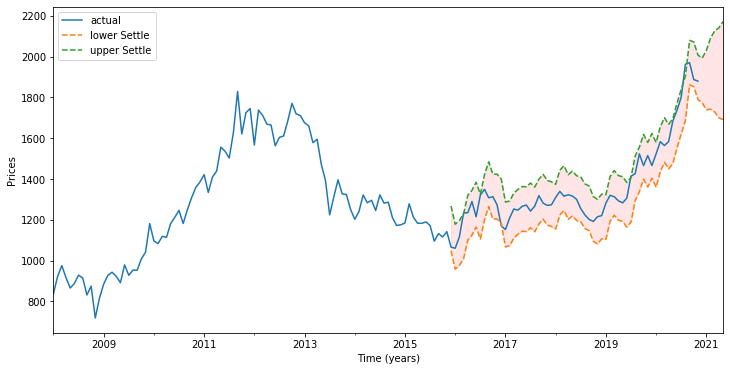

In [41]:
plt.figure(figsize=(12, 6))

ax = df_settle['2008':].plot(label='actual')
prediction_ci.plot(
    ax=ax, style=['--', '--'],
    label='predicted/forecasted')

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:, 0]
upper_ci = prediction_ci.iloc[:, 1]

ax.fill_between(ci_index, lower_ci, upper_ci,
    color='r', alpha=.1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Prices')

plt.legend()
plt.show()